In [1]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols, zeros
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

# Mathematics for Machine Learning

## Session 07: Orthogonal projection; the determinant

## Gerhard Jäger

### November 12, 2024

## Orthogonality

Recall: vectors $\mathbf v$ and $\mathbf w$ are **orthogonal** if and only if

$$
\mathbf v^T \mathbf w = \mathbf 0
$$

#### Examples

- $\begin{bmatrix}1\\1 \\0\end{bmatrix}$, $\begin{bmatrix}0\\0 \\1\end{bmatrix}$


- $\begin{bmatrix}1\\1 \end{bmatrix}$, $\begin{bmatrix}2\\-2\end{bmatrix}$


- $\begin{bmatrix}1\\1 \\ 2\end{bmatrix}$, $\begin{bmatrix}-2\\-2\\2\end{bmatrix}$

- ..

### orthogonal spaces

Two vector spaces $\mathbf V$ and $\mathbf W$ are orthogonal if and only if

$$
\forall \mathbf v\in \mathbf V, \mathbf w \in \mathbf W. \mathbf v^T\mathbf w = \mathbf 0
$$

**Examples**

$$
\begin{aligned}
\mathbf V &= \{\begin{bmatrix}x\\0\end{bmatrix}: x \in \mathbb R\}\\[1em]
\mathbf W &= \{\begin{bmatrix}0\\y\end{bmatrix}: y \in \mathbb R\}\\
\end{aligned}
$$

These are of course the $x$-axis and $y$-axis of a 2d-space.

$$
\begin{aligned}
\mathbf V &= \{\begin{bmatrix}x\\y\\0\end{bmatrix}: x,y \in \mathbb R\}\\[1em]
\mathbf W &= \{\begin{bmatrix}0\\0\\z\end{bmatrix}: z \in \mathbb R\}\\
\end{aligned}
$$

These are the $x$-$y$ plane and the $z$-axis of a 3d-space.

$$
\begin{aligned}
\mathbf V &= \mathrm{span}(
\begin{bmatrix}
1\\
-1\\
0
\end{bmatrix},
\begin{bmatrix}
1\\
1\\
1
\end{bmatrix}
)\\[1em]
\mathbf W &= \mathrm{span}(\begin{bmatrix}-1\\-1\\2\end{bmatrix})\\
\end{aligned}
$$

How do we know whether $\mathbf V$ and $\mathbf W$ are orthogonal?

**Observation** Let $V$ and $W$ be two sets of vectors $\subseteq \mathbb R^n$. 

$\mathrm{span}(V)$ is orthogonal to $\mathrm{span}(W)$ if and only if for all $\mathbf v\in V, \mathbf w \in W$: $\mathbf v$ and $\mathbf w$ are orthogonal.

*Proof*

Suppose $\mathrm{span}(V)$ is orthogonal to $\mathrm{span}(W)$. If $\mathbf v\in V$, then $\mathbf v\in\mathrm{span}(V)$, and likewise for $\mathbf w$. Hence $\mathbf v$ and $\mathbf w$ are orthogonal.

Now suppose for all $\mathbf v\in V, \mathbf w \in W$: $\mathbf v$ and $\mathbf w$ are orthogonal. Let $\mathbf x\in\mathrm{span}(V)$ and $\mathbf y\in\mathrm{span}(W)$.

If $\mathbf x\in\mathrm{span}(V)$ and $\mathbf y\in\mathrm{span}(W)$, $\mathbf x = \sum_i r_i\mathbf v_i$, $\mathbf y = \sum_j s_j\mathbf w_j$ for $r_1,\ldots,r_{|V|}, s_1,\ldots,s_{|W|}\in \mathbb R$.

$$
\begin{aligned}
\mathbf x^T\mathbf y &= (\sum_i r_i\mathbf v_i)^T(\sum_j s_i\mathbf w_j)\\
        &= \sum_i (r_i\mathbf v_i)^T(\sum_j s_j\mathbf w_j)\\
        &= \sum_i \sum_j(r_i\mathbf v_i)^T( s_j\mathbf w_j)\\
        &= \sum_i \sum_jr_i\mathbf v_i^T( s_j\mathbf w_j)\\
        &= \sum_i \sum_jr_is_j\mathbf v_i^T\mathbf w_j\\
        &= \sum_i \sum_jr_is_j\mathbf 0\\
        &= \mathbf 0\\
\end{aligned}
$$

$\dashv$

**Observation**

Let $A$ be an $m\times n$ matrix. Then

- the column space $C(A)$ is orthogonal to the left null space $C(A^T)$, and
- the row space $C(A^T)$ is orthogonal to the null space $N(A)$.

*Proof*

The column space of $A$ is $\mathrm{span}(\{\mathbf a_i|1\leq i \leq n\})$. If $\mathbf x$ is in the left null space of $A$, this means that

$$
A^T \mathbf x = \mathbf 0
$$

It follows that 

$$
\forall i:\mathbf a_i^T\mathbf x = \mathbf 0
$$

Due to the previous observation, it follows that $C(A)$ is orthogonal to $N(A^T)$. 

The proof of the second statement is analogous.

$\dashv$

## Orthogonal projections

Suppose we have two vectors $\mathbf a$ and $\mathbf b$. We want to find the *orthogonal projection from $\mathbf a$ onto the line through $\mathbf b$*. This is a vector $\mathbf p$ with the properties:

- $\mathbf p = x\mathbf b$ ($\mathbf p$ lies on the line defined by $\mathbf a$)
- $\mathbf a - \mathbf p$ is orthogonal to $\mathbf b$

Here is how we find $\mathbf p$:

$$
\begin{aligned}
(\mathbf a - x\mathbf b)^T\mathbf b &= 0\\
(\mathbf a^T - x\mathbf b^T)\mathbf b &= 0\\
\mathbf a^T\mathbf b - x\mathbf b^T\mathbf b &= 0\\
\mathbf a^T\mathbf b &= x\mathbf b^T\mathbf b\\
x &= \frac{\mathbf a^T\mathbf b}{\mathbf b^T\mathbf b}\\
\mathbf p &= \frac{\mathbf a^T\mathbf b}{\mathbf b^T\mathbf b}\mathbf b\\
\end{aligned}
$$

- $\mathbf p$ is called the *projection of $\mathbf a$ onto the line throuhg $\mathbf b$*.
- $\mathbf e = \mathbf a - \mathbf p$ is called the *error*.
- $\mathbf p$ is the point on the line through $\mathbf b$ which is closest to $\mathbf a$, i.e., the point which minimizes the error.

## Orthogonal projections

Now suppose we have a matrix $A$ and a vector $\mathbf b$, and we want to find the *orthogonal projection of  $\mathbf b$ onto the* ***column space*** of $A$.

In other words, we want to find the point $\mathbf p$ which

- is in the column space of $A$, and
- minimizes the error $\mathbf b-\mathbf p$.



<img src="_img/projection.svg"  width="1000" style="display: block; margin-left: auto; margin-right: auto;">


(image from https://medium.com/linear-algebra/part-17-projections-122aac21b07c)
    

- assumptions:

$$
\begin{aligned}
A\mathbf x &= \mathbf p\\
\mathbf p + \mathbf e &= \mathbf b\\
A^T\mathbf e &= \mathbf 0
\end{aligned}
$$

- finding the solution

Let us assume that the columns of $A$ are independent. (If this is not the case, we can replace $A$ by some basis of $C(A)$.





**Observation** $(A^TA)$ is invertible if and only if the columns of $A$ are independent.

*Proof*


Suppose $(A^TA)$ is invertible, and let $A\mathbf x = \mathbf 0$. Then it follows

$$
\begin{aligned}
A^TA\mathbf x &= A^T\mathbf 0\\
A^TA\mathbf x &= \mathbf 0\\
\mathbf x &= (A^TA)^{-1}\mathbf 0\\
&= \mathbf 0
\end{aligned}
$$
This entails that the columns of $A$ are independent.

Now suppose the columns of $A$ are independent. The Gauss-Jordan elimination factorizes

$$
A^T = E R,
$$
where $E$ is the combined elimination matrix and $R$ is the reduced row echelon form of $A^T$.

As shown earlier, $E$ is invertible.

If the columns of $A$ are independent, $R$ contains $n$ pivot columns, and no free column. It follows that

$$
R^T R = \mathbf I,
$$

since the dot product of a pivot column with itself must be $1$, and the dot product of two different pivot columns must be $0$.



Then we have:

$$
\begin{aligned}
A^TA &= ERR^T E^T\\
&= E~\mathbf I~ E^T\\
&= E E^T\\
\end{aligned}
$$

By construction, $E$ is invertible. Therefore

$$
(A^TA)^{-1} = (E^{-1})^T E^{-1}
$$

$\dashv$

- deriving the solution:

$$
\begin{aligned}
A\mathbf x &= \mathbf p\\
\mathbf p + \mathbf e &= \mathbf b\\
A^T\mathbf e &= \mathbf 0\\
A^T\mathbf b &= A^T\mathbf p + A^T\mathbf e\\
A^T\mathbf b &= A^T\mathbf p\\
&= A^T A\mathbf x\\
\mathbf x &= (A^T A)^{-1}A^T\mathbf b\\
\mathbf p &= A(A^T A)^{-1}A^T\mathbf b\\
\end{aligned}
$$


### Projection matrix

The matrix

$$
P = A(A^TA)^{-1}A^T
$$

is the **projection matrix** that maps each vector to its projection onto the column space of $A$.

Each projection matrix $P$ has the property that $PP=P$

$$
\begin{aligned}
P &= A(A^TA)^{-1}A^T\\
PP &= A(A^TA)^{-1}A^TA(A^TA)^{-1}A^T\\
&= A(A^TA)^{-1}(A^TA)(A^TA)^{-1}A^T\\
&= A(A^TA)^{-1}A^T\\
&= P
\end{aligned}
$$

### Statistics interlude: Linear regression

**linear regression**

- independent variables: $m\times n$ matrix $X$
    - $n$: number of observations
    - $m$: number of independent variables
- dependent variable: length-$n$ vector $\mathbf y$
- goal: find parameter vector $\beta$ (length $m+1$) such that the *total squared error* is minimized

$$
\hat\beta = \arg_\beta\min \sum_i (\beta_1 + \sum_{j=1}^m \beta_{j+1}x_{i,j} - y_i)^2
$$

Let's rephrase this with linear algebra

$$
\begin{aligned}
X_1 &= [\mathbf 1 X]\\
\hat {\mathbf y} &= X_1\beta\\
\epsilon &= ||\mathbf y - \hat {\mathbf y}||^2\\
\hat\beta &= \arg_\beta\min \epsilon
\end{aligned}
$$

From the second equation we see that $\hat {\mathbf y}$ is in the column space of $X_1$. 

The goal is to find the point $\hat {\mathbf y}$ in the column space of $X_1$ that minimizes the squared distance to $\mathbf y$.

This is also the point that minimizes the absolute distance between $\hat {\mathbf y}$ and $\mathbf y$. In other words, $\hat {\mathbf y}$ is the projection of $\mathbf y$ onto the column space of $X_1$:

$$
\hat\beta = (X_1^TX_1)^{-1}X_1^T\mathbf y
$$

If the columns of $X_1$ are not independent, $\hat\beta$ is not well-defined (and your statistics software will complain).

https://book.stat420.org/collinearity.html

# Determinants

Consider the matrix 
$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
$$

What is the area of the parallelogram defined by the two column vectors?

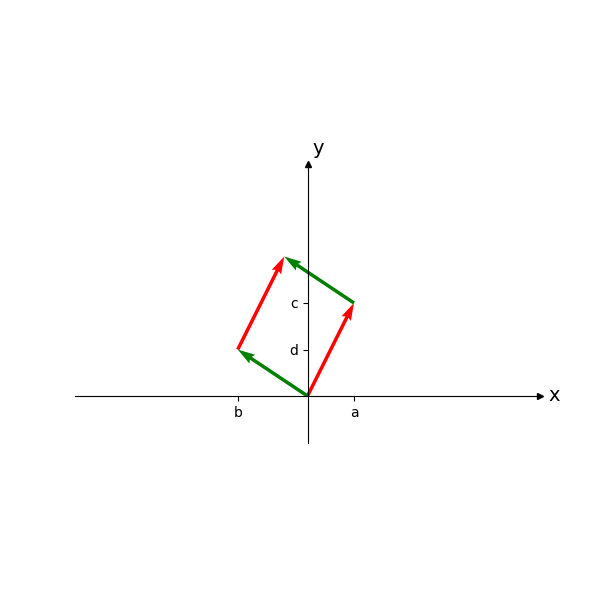

In [2]:
a, b, c, d = 2, -3, 4, 2

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -9, 9, -1, 9
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([b,a])
ax.set_xticklabels(['b','a'])
ax.set_yticks([d,c])
ax.set_yticklabels(['d','c'])

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)


ax.quiver((0,),(0,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((b,),(d,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((0,),(0,), (b,), (d,), units="xy", scale=1, color='green')
ax.quiver((a,),(c,), (b,), (d,), units="xy", scale=1, color='green')

### horizontal elimination

$$
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix} \Rightarrow
\begin{bmatrix}
\frac{ad-bc}{d} & b \\
0 & d
\end{bmatrix} \Rightarrow
\begin{bmatrix}
\frac{ad-bc}{d} & 0 \\
0 & d
\end{bmatrix}
$$

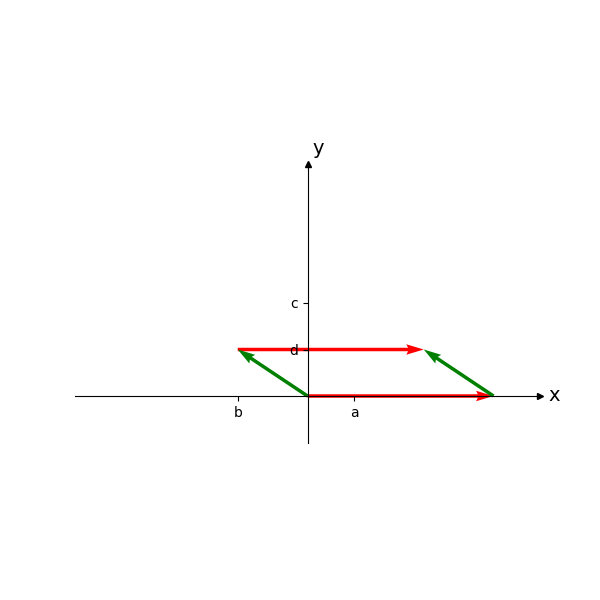

In [3]:
a, b, c, d = 8, -3, 0, 2

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -9, 9, -1, 9
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([-3, 2])
ax.set_xticklabels(['b','a'])
ax.set_yticks([2, 4])
ax.set_yticklabels(['d','c'])

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)


ax.quiver((0,),(0,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((b,),(d,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((0,),(0,), (b,), (d,), units="xy", scale=1, color='green')
ax.quiver((a,),(c,), (b,), (d,), units="xy", scale=1, color='green')

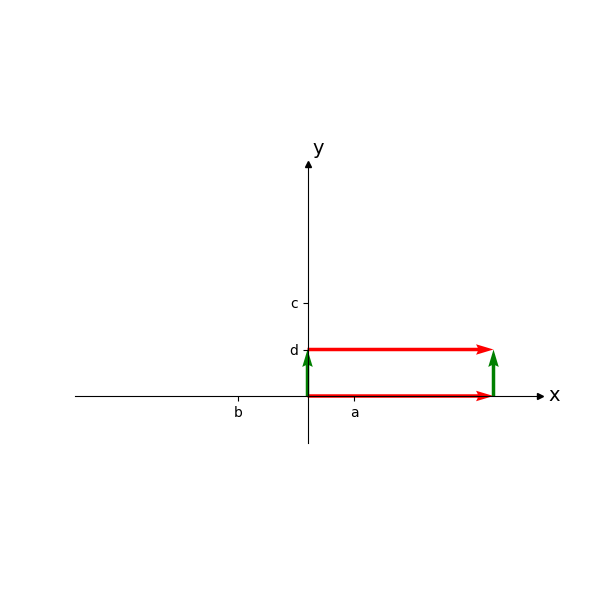

In [4]:
a, b, c, d = 8, 0, 0, 2

fig, ax = plt.subplots(figsize=(6,6))
xmin, xmax, ymin, ymax = -9, 9, -1, 9
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([-3,2])
ax.set_xticklabels(['b','a'])
ax.set_yticks([2,4])
ax.set_yticklabels(['d','c'])

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)


ax.quiver((0,),(0,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((b,),(d,), (a,), (c,), units="xy", scale=1, color='red')
ax.quiver((0,),(0,), (b,), (d,), units="xy", scale=1, color='green')
ax.quiver((a,),(c,), (b,), (d,), units="xy", scale=1, color='green')

The area of this rectangle is

$$
ad-bc
$$

Since the geometric transformations  corresponding to elimination did not change the area, the original parallelogram also has the area $ad-bc$.

### Determinants

The determinant of a matrix $A$ is written as
$$
\displaystyle\mathrm{det}(A)
$$

or 

$$
\displaystyle|A|
$$

The determinant is a function that maps each *square matrix* to a *real number*.

### three ways to compute the determinant

- axiomatic approach
- via permutations ("Leibniz' formula")
- recursively via cofactors ("Laplace expansion")

The absolute value of the determinant equals the area/volume of the parallelepiped defined by the column vectors.

## Axiomatix approach

#### 1. For each $n$, $$|\mathbf I_n| = 1$$ where $\mathbf I_n$ is the $n\times n$ identity matrix.

#### 2. If $B$ is the result of swapping two columns in $A$, then
$$
|B| = - |A|
$$

#### 3. $|A|$ is a linear function of each of its columns:

$$
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &x\mathbf a_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix} = 
x\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf a_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix}\\[3em]
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf a_i + \mathbf b_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix} = 
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf a_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix} +
\begin{vmatrix}
|&\cdots & |&\cdots & |\\
\mathbf a_1 & \cdots &\mathbf b_i & \cdots & \mathbf a_n\\
|&\cdots & |&\cdots & | \\
\end{vmatrix}
$$


As we will see later, there is exactly one function with these properties.

### Consequences

From these three axioms, we can derive seven useful lemmas.

#### 4. If two columns of $A$ are identical, $|A| = 0$.

*Proof:* Swapping the two identical columns does not change $A$, but according to Axiom 2, we get $|A| = -|A|$. The only value consistent with this is $|A| = 0$.

$\dashv$

#### 5. Adding a multiple of one column of $A$ to another column does not change $|A|$.

*Proof:* According to rules 3 and 4:

$$
\begin{aligned}
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i + x\mathbf a_j&\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} &= 
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} +
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& x\mathbf a_j &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix}\\[2em]
&=
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} +
x\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_j &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix}\\[2em]
&= 
\begin{vmatrix}
| & \cdots & | & | & | & \cdots & | \\
\mathbf a_1 & \cdots &\mathbf a_{i-1}& \mathbf a_i &\mathbf a_{i+1} & \cdots & \mathbf a_n\\
| & \cdots & | & | & |& \cdots & |\\
\end{vmatrix} \\[2em]
&=|A|
\end{aligned}
$$

$\dashv$

#### 6. If $A$ has an all-zero column, then $|A| = 0$.

*Proof:*

If $A$ has more than one all-zero columns, this follows from rule 4. If it has only one all-zero column, then adding one of the other columns to the all-zero column does not change the determinant according to rule 5. This will lead to a matrix with two identical columns though, which has a determinant $=0$ according to rule 4. 

$\dashv$

#### 7. The determinant of a triangular matrix equals the product of its diagonal entries.

*Proof:*

Let us first assume that all diagonal entries are $\neq 0$. 

According to rule 5, we can perform mirrored Gauss elimination (working with columns rather than with rows) with $A$ if it is upper triangular, and otherwise mirrored Jordan elimination. According to rule 5 this does not change the determinant, and according to the rules of Gauss-Jordan elimination, this does not change the diagonal entries. We end up with a diagonal matrix

$$
D = \begin{bmatrix}
d_{11} & & \\
& \ddots & \\
& & d_{ii}\\
&&&\ddots\\
&&&&d_{nn}
\end{bmatrix}
$$

Using Axiom 2, it follows that

$$
|D| = d_{11}\times \cdots \times d_{nn}\times |\mathbf I_n| = d_{11}\times \cdots \times d_{nn}
$$



Now suppose $d_{ii}=0$. Then the product of the diagonal entries $=0$. 

After completing mirrorred Gauss-Jordan elimination, the last column is all-zero. Elimination steps do not change the determinant, so the determinant must be $0$ according to rule 6.


$\dashv$

**Uniqueness of the determinant function**

With these rules, we can compute the determinant of each square matrix by performing Gauss elimination (possibly preceded by column permutations) and computing the product of the resulting triangular matrix. This algorithm only relies on the three axioms, so any function fulfilling the axioms must yield the same result for each matrix.

#### 8. Product rule: for all square matrices $A, B$ of the same size:

$$
|AB| = |A| \times |B|
$$

*Proof:*

Suppose $|A| = 0$. Gauss elimination does not change the determinant. If we need to perform column permutation prior to (mirrorred) Gauss elimination, this only changes the sign of the determinant, not its absolute value.
Since $|A|=0$, the result of Gauss elimination must, according to Lemma 7, contain at least one $0$. Hence $A$ must have rank $r<n$ (where $n$ is the number of columns of $A$). In other words, there is a vector $\mathbf x\neq \mathbf 0$ such that $\mathbf x'A = \mathbf 0$. It follows that $\mathbf x'AB = \mathbf 0$, so $AB$ also has rank $< n$. This entails that the result of Gauss elimination applied to $AB$ has a $0$ on the main diagonal, so $|AB| = 0$.

Now suppose $|A| \neq 0$. Let us define a function 

$$
D(B) \doteq 
\left\{
\begin{array}{ll}
\frac{|AB|}{|A|}&\mathrm{~if~}|A|\neq 0\\
|B| &\mathrm{~ else}
\end{array}
\right.
$$

The function $D$ fulfills axioms 1–3:

- If $B = \mathbf I$, then $D(B) = \frac{|A|}{|A|} = 1$
- If $C$ is the result of multiplying column $i$ in $B$ by $x$, then there is a matrix $M$, which is exactly like the identity matrix except $m_{ii} = x$, with:

$$
\begin{aligned}
C &= BM\\
AC &= ABM
\end{aligned}
$$

So $AC$ is the result of multiplying column $i$ in $(AB)$ by $x$. Hence

$$
\begin{aligned}
|AC|&= |ABM|\\
&= x|AB|\\
D(C) &= xD(B)
\end{aligned}
$$




- If $C$ is the result of swapping columns $i$ and $j$ in $B$, then

$$
C = B P,
$$

Where $P$ is like the identiy matrix, except that $p_{ij}, p_{ji} = 1, p_{ii}, p_{jj} = 0$.

Then 
$$
AC =  ABP,
$$

hence $AC$ is the result of swapping columns $i$ and $j$ in $AB$. Therefore

$$
\begin{aligned}
|AC| &= |ABP|\\
&= - |AB|\\
D(C) &= - D(B)
\end{aligned}
$$

Therefore $D(C) = - D(B)$

Since there is only one function that fulfills axioms 1–3, $D(B) = |B|$. It follows that if $|A|\neq 0$.

$$
\begin{aligned}
D(B) &=& \frac{|AB|}{|A|} &= |B|\\
&&|AB| &= |A| \times |B|
\end{aligned}
$$


$\dashv$

#### 9. $|A|\neq 0$ if and only if $A$ is invertible.

*Proof:*

Suppose $|A|\neq 0$. Then Gauss-Jordan elimination ends in the identity matrix, and the product of the elimination steps amount to $A^{-1}$. 

If $A$ is invertible, $A^{-1}$ exists, with

$$
\begin{aligned}
A A^{-1} &= \mathbf I\\
|A A^{-1}| &= |\mathbf I|\\
|A|\times |A^{-1}|&= 1\\
|A| &= \frac{1}{|A^{-1}|}\\
&\neq 0
\end{aligned}
$$

$\dashv$

#### 10. $|A| = |A^T|$

*Proof:*

It follows directly from rule 7 that for triangular matrices $M$, $|M| = |M^T|$.

$$
\begin{aligned}
A &= LU\\
|A| &= |L| \times |U|\\
&= |U| \times |L|\\
&= |U^T| \times |L^T|\\
&= |U^TL^T|\\
&= |(LU)^T|\\
&= |A^T|
\end{aligned}
$$

$\dashv$

It follows from rules 5 and 10 that adding a multiple of one row to another row does not change the determinant. So all elimination steps keep the determinant unchanged.

### Takehome messages

1. The fastest general way to compute the determinant of a matrix is by

- performing Gauss elimination
- computing the product of the diagonal entries.
    
    

2. A square matrix is invertible if and only if its determinant $\neq 0$.

